In [ ]:
# load data

# split data into training/test sets

# build the network architecture

# compile the network

# train network

In [6]:
%pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 239.4 MB 2.5 MB/s eta 0:00:01    |████████                        | 59.1 MB 884 kB/s eta 0:03:24     |████████████████▊               | 125.3 MB 582 kB/s eta 0:03:16     |████████████████████████████▌   | 213.5 MB 93 kB/s eta 0:04:39     |█████████████████████████████▋  | 221.3 MB 125 kB/s eta 0:02:24
     |████████████████████████████████| 57 kB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 5.5 MB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 414 kB 886 kB/s eta 0:00:01
     |████████████████████████████████| 133 kB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 2.9 MB 275 kB/s eta 0:00:01
     |████████████████████████████████| 3.5 MB 339 kB/s eta 0:00:01
     |████████████████████████████████| 71 kB 905 kB/s eta 0:00:011
     |████████████████████████████████| 396 kB 1.7 MB/s eta 0:00:01
     |██████████████████████████████

In [42]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models, regularizers


In [34]:
DATASET_PATH = "data.json"

In [35]:
def load_data(dataset_path):
    with open(dataset_path, "r") as fp:
        data = json.load(fp)

    # convert lists into numpy arrays
    X = np.array(data["mfcc"])
    Y = np.array(data["labels"])
    mapping = data["mapping"]  # Add this line to load the mapping

    print("Data Loaded!")
    return X, Y, mapping  # Return mapping as well

In [36]:
def plot_history(history):
    fig, axs = plt.subplots(2, 1, figsize=(10, 10))

    # create accuracy subplot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="validation accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="upper left")
    axs[0].set_title("Accuracy over Epochs")

    # create loss subplot
    axs[1].plot(history.history["loss"], label="train loss")
    axs[1].plot(history.history["val_loss"], label="validation loss")
    axs[1].set_ylabel("Loss")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper left")
    axs[1].set_title("Loss over Epochs")

    plt.show()

Data Loaded!


/Users/andrewangulo/Library/Python/3.9/lib/python/site-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape (Reshape)               │ (None, 130, 13, 1)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 130, 13, 32)    │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 130, 13, 32)    │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 65, 6, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 65, 6, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 65, 6, 64)      │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 65, 6, 64)      │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 3, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 32, 3, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 3, 128)     │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 3, 128)     │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 1, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 16, 1, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 620,682 (2.37 MB)

 Trainable params: 620,234 (2.37 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.1741 - loss: 4.0981 - val_accuracy: 0.3358 - val_loss: 2.4394
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.2865 - loss: 2.5939 - val_accuracy: 0.3788 - val_loss: 2.4045
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.3198 - loss: 2.4476 - val_accuracy: 0.3611 - val_loss: 2.3994
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.3710 - loss: 2.2769 - val_accuracy: 0.3822 - val_loss: 2.4227
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.4000 - loss: 2.1902 - val_accuracy: 0.3812 - val_loss: 2.4201
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.4268 - loss: 2.1179 - val_accuracy: 0.4236 - val_loss: 2.3098
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.4601 - loss: 2.0428 - val_accuracy: 0.4299 - val_loss: 2.4085
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.4857 - loss: 1.9664 - val_accu

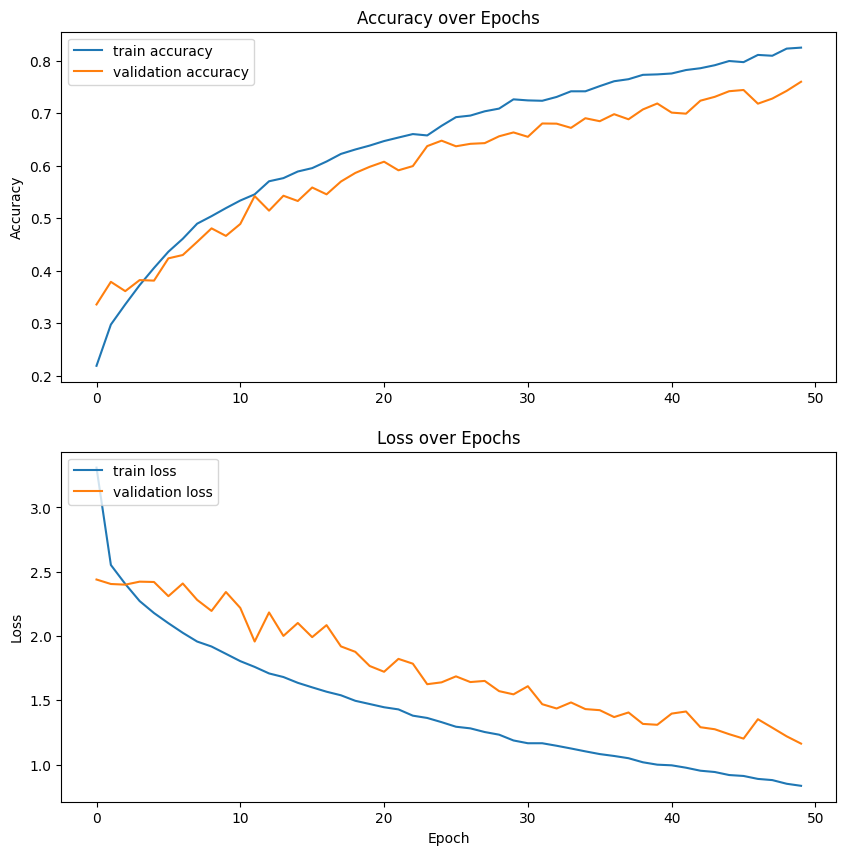

In [43]:
if __name__ == "__main__":

    # load data
    inputs, targets, mapping= load_data("data.json")  # Make sure DATASET_PATH is defined or replace it with the actual path
    
    # split data
    inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, 
                                                                              targets, 
                                                                              test_size=0.3)

    # model architecture
    model = models.Sequential([
    # Reshape input to 4D tensor for Conv2D
    layers.Reshape((inputs.shape[1], inputs.shape[2], 1), input_shape=(inputs.shape[1], inputs.shape[2])),
    
    # First Conv2D layer
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    
    # Second Conv2D layer
    layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    
    # Third Conv2D layer
    layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    
    # Flatten and Dense layers
    layers.Flatten(),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.4),
    layers.Dense(10, activation='softmax')
])
    
    # compile the model
    optimizer = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer,
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    
    # summary of the model
    model.summary()

    # training
    history = model.fit(inputs_train, targets_train, validation_data=(inputs_test, targets_test), epochs=50, batch_size=32)

    # plot accuracy and error over the epochs
    plot_history(history)

In [44]:
# Save the trained model
model.save("genre_classification_model.keras")

# Save the label mapping
with open('label_mapping.json', 'w') as f:
    json.dump(mapping, f)